In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction


One of the main problems of  travelers is to find an affordable place to stay. One suitable solution is Airbnb. In this project, we will try to investigate the parameters that affect the price of an apartment. To be more specific, we are going to use the Seatlle Airbnb Open dataset for our purpose

# Download the data

In [3]:
reviews=pd.read_csv('reviews.csv')

In [4]:
listing=pd.read_csv('listings.csv')

In [5]:
calendar=pd.read_csv('calendar.csv')

# The CRISP-DM approach

### 1.Business/Context Understanding

The questions we need to answer according to our informations that we have available.

### 2.Data Understanding

Explore and understand the quality of our data

### 3.Data Preparation


Discard irrelevant informations and impute the missing values

### 4.Modeling and Visualization

Explore the correlation among the variables and the trends of thes variables

### 5.Results

Find the results according to our questions

## 1.Business/Context Understanding

We will try to answer the following three questions
<br>
1)How the neigborhoud affect the price of the property
<br>
2)What kind of properties have the highest price and how this is related with the rating score from the customers
<br>
3)The seasonal trend of the price

## 2.Data Understanding

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [10]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


#### Examine the distribution of variables from listing data

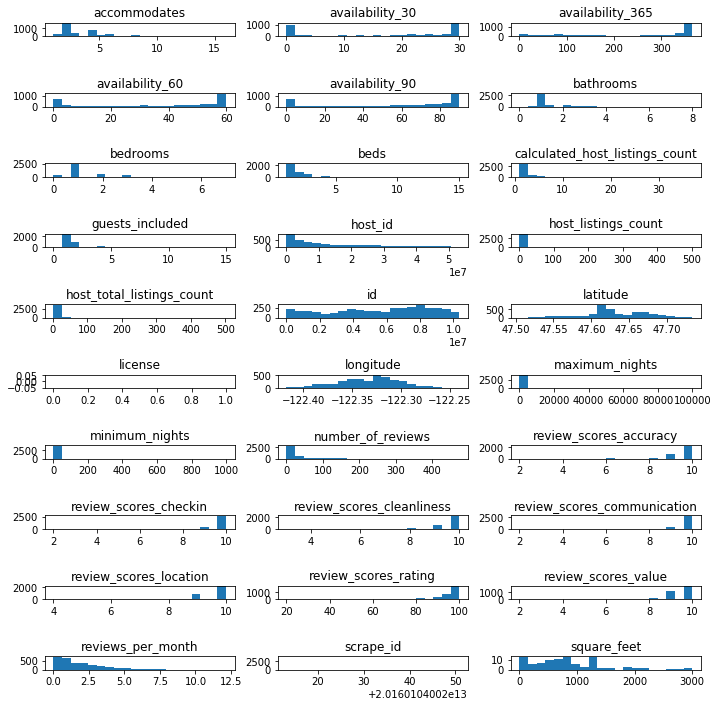

In [11]:
listing.hist(figsize = (20,16),bins=20, grid=False, layout=(15, 3))
plt.tight_layout(rect=[0, 0, 0.5, 0.9])
plt.show()

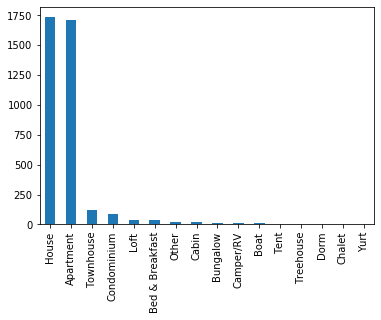

In [13]:
listing.property_type.value_counts().plot(kind='bar')

We observe from the distribution plot that the travelers prefer apartments with most two bedrooms and the number of beds around three. Also, they prefer houses and apartments compared to other kinds of properties. 

#### Examine the features with non-zero number of missing values

In [14]:
listing.loc[:, listing.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
reviews_per_month               627
first_review                    627
last_review                     627
space                           569
host_response_time              523
host_response_rate              523
neighbourhood                   416
thumbnail_url                   320
medium_url                      320
xl_picture_url              

License,square_feet and, monthly_price include many missing values as a result, we should exclude them from our data.

In [15]:
calendar.loc[:, calendar.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

price    459028
dtype: int64

We observe that almost one-third of the values of price are missing values.

## 3.Data Preparation

#### We observed that some variables include missing vallue. Also the price in listing and calendar data is an object we have to transform it to numeric value.As a result:

1)Transform the price to numeric value
<br>
2)Merge the calendar and listing data
<br>
3)Impute missing values

#### Transform price to numeric value

In [16]:
listing['price'] = listing['price'].astype(str)
listing['price'] = listing['price'].str.replace("[$, ]", "").astype("float")
listing['weekly_price'] = listing['weekly_price'].astype(str)
listing['weekly_price'] = listing['weekly_price'].str.replace("[$, ]", "").astype("float")
listing['monthly_price'] = listing['monthly_price'].astype(str)
listing['monthly_price'] = listing['monthly_price'].str.replace("[$, ]", "").astype("float")
listing['security_deposit'] = listing['security_deposit'].astype(str)
listing['security_deposit'] = listing['security_deposit'].str.replace("[$, ]", "").astype("float")
listing['cleaning_fee'] = listing['cleaning_fee'].astype(str)
listing['cleaning_fee'] = listing['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listing[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,NaN,NaN,NaN,NaN
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,NaN,NaN,1000.0,300.0
3,100.0,650.0,2300.0,NaN,NaN
4,450.0,NaN,NaN,700.0,125.0


In [17]:
calendar['price'] = calendar['price'].astype(str)
calendar['price'] = calendar['price'].str.replace("[$, ]", "").astype("float")

In [18]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Merge listing and calendar data

In [19]:
listing = listing.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendar, listing, on = ['listing_id'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 95 columns):
listing_id                          1393570 non-null int64
date                                1393570 non-null object
available                           1393570 non-null object
price_x                             934542 non-null float64
listing_url                         1393570 non-null object
scrape_id                           1393570 non-null int64
last_scraped                        1393570 non-null object
name                                1393570 non-null object
summary                             1328965 non-null object
space                               1185885 non-null object
description                         1393570 non-null object
experiences_offered                 1393570 non-null object
neighborhood_overview               1016890 non-null object
notes                               807380 non-null object
transit                             1052660 non-nu

###### We want to include the amenities of each apartment in our research

In [21]:
df.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                      16425
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                   4015
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}     3650
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Buzzer/Wireless Intercom",Heating,Washer,

#### We observe that the amenities include too many informations so it is not useful to parse it in different columns
It is better to estimate the amount of amenities for each apartment

In [22]:
import csv

input = df.amenities
h = csv.reader(input)
hk=[]
for fields in h:
    d=0
    for i,k in enumerate(fields):
        #print(i,k)
        if i!=0:
            d=1+i
    hk.append(d)
amenities_count=np.array(hk)  
print(amenities_count)

[10 10 10 ... 22 22 22]


In [23]:
df['amenities_count']=pd.DataFrame(amenities_count)
df.amenities_count.head()

0    10
1    10
2    10
3    10
4    10
Name: amenities_count, dtype: int32

## Impute missing values

In [24]:
def clean_data (df):
    '''
  INPUT:
  df- Themerged dataframe that contatains all our listing  and calendar data
  
  OUTPUT:
  df_new -irrelevant columns will be dropped,missing values will be imputed.

  '''
    drop_columns=['available', 'host_id','host_location','last_scraped',
                   'host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count',
                    'calendar_updated',
                   'listing_url','scrape_id', 'name', 'summary','space', 'description',
                   'experiences_offered', 'street', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
                   'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about',
                   'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code',
                   'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability',
                   'availability_30',
                   'availability_60', 'availability_90', 'availability_365',
                   'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license',
                   'jurisdiction_names',
                  'reviews_per_month','price_y','host_since','host_response_time','host_response_rate',
                  'host_is_superhost','host_listings_count','host_verifications',                 
                   'host_has_profile_pic','host_identity_verified','cancellation_policy',
                    'require_guest_profile_picture','require_guest_phone_verification',
                     'calculated_host_listings_count','amenities','instant_bookable']

     
 ### we drop Licence,square_feet and monthly_price  because they include many missing values
    df1=df.drop(columns=drop_columns)
 ### we drop the missing values of the price
    df1.dropna(subset=['price_x'],inplace=True)
    
    ### We replace the missing values in our variables
    df1.fillna(df1.mode(),inplace=True)
    return df1
   

In [26]:
df_new=clean_data(df)
df_new.head()

,listing_id,date,price_x,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_count
0,241032,2016-01-04,85.0,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,...,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,10
1,241032,2016-01-05,85.0,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,...,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,10
9,241032,2016-01-13,85.0,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,...,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,10
10,241032,2016-01-14,85.0,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,...,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,10
14,241032,2016-01-18,85.0,Queen Anne,West Queen Anne,Queen Anne,Apartment,Entire home/apt,4,1.0,...,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,10


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 30 columns):
listing_id                      934542 non-null int64
date                            934542 non-null object
price_x                         934542 non-null float64
neighbourhood                   827611 non-null object
neighbourhood_cleansed          934542 non-null object
neighbourhood_group_cleansed    934542 non-null object
property_type                   934233 non-null object
room_type                       934542 non-null object
accommodates                    934542 non-null int64
bathrooms                       929739 non-null float64
bedrooms                        932539 non-null float64
beds                            934177 non-null float64
bed_type                        934542 non-null object
weekly_price                    504764 non-null float64
monthly_price                   398891 non-null float64
security_deposit                456422 non-null float64
cle

## Analysis-Results

##### 1)How the neigborhoud affect the price of the property


In [28]:
df_new.neighbourhood_group_cleansed.unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [29]:
df_new.neighbourhood.unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [30]:
df_neighb=df_new.groupby(['neighbourhood'])['price_x'].mean()

Text(0, 0.5, 'Average price per neihborhood')

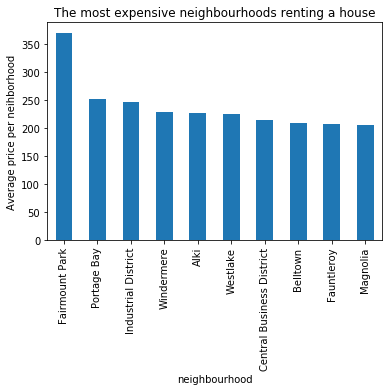

In [31]:
df_neighb.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('The most expensive neighbourhoods renting a house')
plt.ylabel('Average price per neihborhood')

Text(0, 0.5, 'Average price per neighborhood')

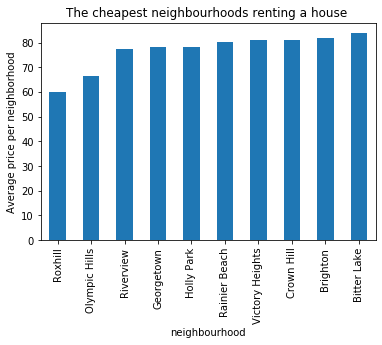

In [32]:
df_neighb.sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('The cheapest neighbourhoods renting a house ')
plt.ylabel('Average price per neighborhood')

Exploring the neighborhoods with the highest and lowest price for a house, we observe that there is a distinct difference in these areas. By far, the most expensive areas are Fairmount Park, Portage Bay, and Industrial District. On the other hand, the cheapest areas are Roxhill, Olympic Hills and Riverview.

###  2)What kind of properties have the highest price and how this is related with the rating score from the customers


In the second quetion we try investigate how the type of the property influence the price. Moreover the correlation among the type of the house,the facilities and the price

In [33]:
df_property=df_new.groupby(['property_type'])['price_x'].mean()

Text(0, 0.5, 'Average price per property')

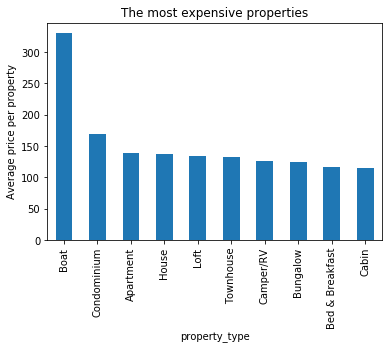

In [34]:
df_property.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('The most expensive properties')
plt.ylabel('Average price per property')

Text(0, 0.5, 'Average price per property')

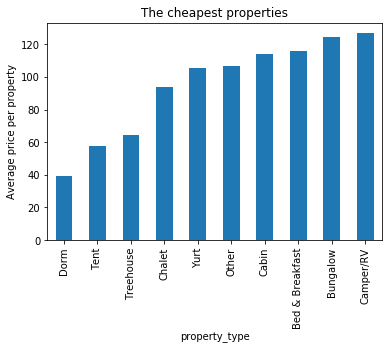

In [35]:
df_property.sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('The cheapest properties')
plt.ylabel('Average price per property')

The cheapest solution is the dorm, tent, and treehouse. On the other side, boat, condominium, appartment, and house are the most expensive solutions.

#### We observe the reation of the facilities with the price

In [37]:
columns_rating=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
'review_scores_location','review_scores_value','price_x' ]

In [38]:
df_rating=df_new[columns_rating]
df_rating.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_x
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
9,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
10,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
14,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0


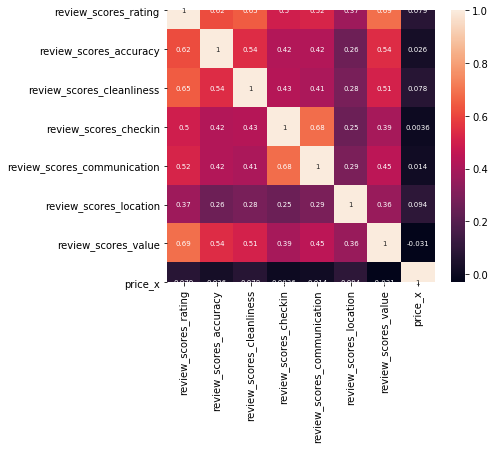

In [39]:
plt.figure(figsize=(6,5))
corr=df_rating.corr()
sns.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True, annot_kws={"size": 7})


It is difficult to understand if the opinion of the customers is related to the price of the property. The review rating of the house is strongly related to  cleanliness, accuracy,  and check-in. As a result, the customers look in detail about the cleanliness of the house, the accuracy,  and the check-in of the house.

#### It is also important to examine if there  is any relationship among the rating of each property with the property.

We observe that the review rating is influenced mainly from cleanliness, accuracy, and check-in.

In [40]:
df_property_rate=df_new.groupby(['property_type'])['review_scores_rating'].mean()

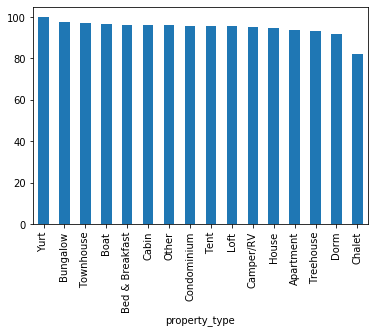

In [41]:
df_property_rate.sort_values(ascending=False).plot(kind='bar')


Finally, we observe that the rating of each type of property is irrelevant to the price of this property. The reasons that a customer is satisfied or not depend on mainly the cleanliness, the accuracy and the check-in of this property.

### 3)The seasonal trend of the price

It is significant to observe the monthly variation of the price of the aparments. We can avoid the high season and pay high rents for the properties

In [42]:
df_date=df_new['date']

In [43]:
df_date.head()

0     2016-01-04
1     2016-01-05
9     2016-01-13
10    2016-01-14
14    2016-01-18
Name: date, dtype: object

In [44]:
df_day=df_date.str.split("-", expand=True)


In [45]:
df_day.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)

In [46]:
df_day=pd.DataFrame(df_day)


In [47]:
df_seas=pd.concat([df_day,df_new.price_x],axis=1)

In [48]:
df_seas.head()

,Year,Month,Day,price_x
0,2016,01,04,85.0
1,2016,01,05,85.0
9,2016,01,13,85.0
10,2016,01,14,85.0
14,2016,01,18,85.0


In [49]:
df_month=df_seas.groupby(['Month'])['price_x'].mean()

Text(0.5, 1.0, 'Average price per month')

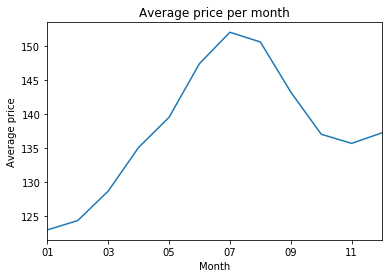

In [50]:
df_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average price')
plt.title('Average price per month')

It is obvious that during the summer and especially during  July, the price of the properties reaches the maximum values. On the other hand, during the winter the price of the houses is low. As a result, if we want to visit Seattle and not spend enough money on the house, the winter, especially  January, is a nice option.

In [52]:
df_july=df_seas[df_seas.Month=='07']

Text(0.5, 1.0, 'Average price per month')

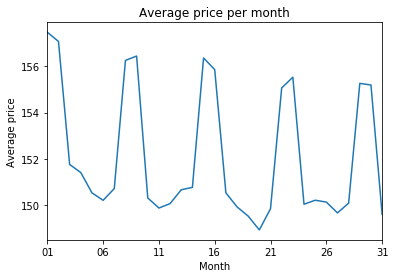

In [53]:
df_july_daily=df_july.groupby(['Day'])['price_x'].mean()
df_july_daily.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average price')
plt.title('Average price per month')

It is interesting that the price during July, it shows a periodicity with maximum and minimum values